# Reading Data & Configuration

In [1]:
#imports
#numpy, pandas, scipy,math, matplotlib
import numpy as np
import pandas as pd
import scipy 
from math import sqrt
import matplotlib.pyplot as plt
from sklearn import preprocessing

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#tunning 
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV



In [2]:
credit = pd.read_csv('C:\\Util\\Cenfotec\\Module5_Task2\\default of credit card clients.csv', header =1)

In [3]:
#simply view a quick sample the dataframe by calling the name in a cell
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
#What type credit
type(credit)

pandas.core.frame.DataFrame

In [5]:
#understand the makeup of the data (like funsction summary() in R)
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Cleaning

In [6]:
#check the data types of each variable
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [7]:
pd.isnull(credit['SEX'])

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: SEX, Length: 30000, dtype: bool

In [8]:
#Is NaN
credit.isnull()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
#Is not NaN
credit.notnull()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
29996,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
29997,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
29998,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [10]:
# ask for total missing values by column
credit.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [11]:
#	Drop	rows	with	any	column	having	NA/null	data.	
drop_credit = credit.dropna()

In [12]:
drop_credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Cleaning: Dropping Columns in a DataFrame

In [13]:
#Correlation Matrix
credit.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


In [14]:
corrMatrix = credit.corr()
corrMatrix.style.background_gradient(cmap='coolwarm')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,1,0.0261792,0.0184975,0.0391767,-0.0290794,0.0186777,-0.0305749,-0.0112149,-0.0184936,-0.00273489,-0.0221992,-0.0202701,0.0193887,0.0179819,0.0243541,0.0403506,0.0167053,0.0167296,0.00974244,0.00840612,0.0391505,0.00779313,0.000652188,0.00299978,-0.013952
LIMIT_BAL,0.0261792,1,0.0247552,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.26746,-0.249411,-0.235195,0.28543,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.15352
SEX,0.0184975,0.0247552,1,0.0142319,-0.0313888,-0.0908736,-0.0576429,-0.070771,-0.0660961,-0.0601732,-0.0550639,-0.0440078,-0.0336419,-0.0311835,-0.0245633,-0.0218797,-0.0170052,-0.0167331,-0.000242455,-0.00139091,-0.00859662,-0.00222897,-0.00166716,-0.00276602,-0.0399606
EDUCATION,0.0391767,-0.219161,0.0142319,1,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.0975202,0.082316,0.0235812,0.0187488,0.0130024,-0.000451345,-0.0075665,-0.00909895,-0.0374562,-0.0300382,-0.0399431,-0.0382182,-0.0403585,-0.0371999,0.0280061
MARRIAGE,-0.0290794,-0.108139,-0.0313888,-0.143464,1,-0.41417,0.0199172,0.0241991,0.0326877,0.0331215,0.0356292,0.0343448,-0.0234718,-0.0216018,-0.0249095,-0.0233438,-0.0253934,-0.0212068,-0.005979,-0.0080927,-0.00354135,-0.0126593,-0.00120476,-0.00664094,-0.0243392
AGE,0.0186777,0.144713,-0.0908736,0.175061,-0.41417,1,-0.0394474,-0.0501478,-0.0530484,-0.0497217,-0.053826,-0.0487734,0.0562385,0.0542831,0.0537097,0.0513531,0.049345,0.0476127,0.0261467,0.0217849,0.0292474,0.021379,0.02285,0.0194782,0.0138898
PAY_0,-0.0305749,-0.271214,-0.0576429,0.105364,0.0199172,-0.0394474,1,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.17698,-0.0792687,-0.0701005,-0.0705608,-0.0640049,-0.0581899,-0.0586732,0.324794
PAY_2,-0.0112149,-0.296382,-0.070771,0.121566,0.0241991,-0.0501478,0.672164,1,0.766552,0.662067,0.62278,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.0807007,-0.05899,-0.0559012,-0.0468584,-0.0370931,-0.0365004,0.263551
PAY_3,-0.0184936,-0.286123,-0.0660961,0.114025,0.0326877,-0.0530484,0.574245,0.766552,1,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.00129481,-0.0667934,-0.0533108,-0.0460665,-0.0358631,-0.0358611,0.235253
PAY_4,-0.00273489,-0.26746,-0.0601732,0.108793,0.0331215,-0.0497217,0.538841,0.662067,0.777359,1,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.00936214,-0.00194366,-0.0692352,-0.0434614,-0.0335895,-0.0265651,0.216614


In [15]:
credit.corr().unstack().sort_values().drop_duplicates()

AGE        MARRIAGE    -0.414170
LIMIT_BAL  PAY_2       -0.296382
           PAY_3       -0.286123
           PAY_0       -0.271214
           PAY_4       -0.267460
                          ...   
BILL_AMT2  BILL_AMT3    0.928326
BILL_AMT4  BILL_AMT5    0.940134
BILL_AMT6  BILL_AMT5    0.946197
BILL_AMT2  BILL_AMT1    0.951484
ID         ID           1.000000
Length: 301, dtype: float64

In [16]:
#CHECK IF THERE'RE  CORRELATION > 0.85
# map features to their absolute correlation values
corr = credit.corr().abs()

# set equality (self correlation) as zero
corr[corr == 1] = 0

# of each feature, find the max correlation
# and sort the resulting array in ascending order
corr_cols = corr.max().sort_values(ascending=False)

# display the highly correlated features
display(corr_cols[corr_cols > 0.85])

BILL_AMT1    0.951484
BILL_AMT2    0.951484
BILL_AMT6    0.946197
BILL_AMT5    0.946197
BILL_AMT4    0.940134
BILL_AMT3    0.928326
dtype: float64

In [17]:
to_drop = ['BILL_AMT2','BILL_AMT4','BILL_AMT6']

In [18]:
#nplace to True specifies that our changes be made directly to the objec
credit.drop(to_drop,inplace=True,axis=1)

In [19]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 22 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
PAY_AMT1                      30000 non-null int64
PAY_AMT2                      30000 non-null int64
PAY_AMT3                

In [20]:
credit.corr().unstack().sort_values().drop_duplicates()

AGE        MARRIAGE    -0.414170
LIMIT_BAL  PAY_2       -0.296382
           PAY_3       -0.286123
           PAY_0       -0.271214
PAY_4      LIMIT_BAL   -0.267460
                          ...   
           PAY_5        0.819835
BILL_AMT1  BILL_AMT5    0.829779
BILL_AMT5  BILL_AMT3    0.883910
BILL_AMT3  BILL_AMT1    0.892279
ID         ID           1.000000
Length: 232, dtype: float64

In [21]:
to_drop2 = ['BILL_AMT3','BILL_AMT5']
#nplace to True specifies that our changes be made directly to the objec
credit.drop(to_drop2,inplace=True,axis=1)

In [22]:
credit.corr().unstack().sort_values().drop_duplicates()

MARRIAGE   AGE         -0.414170
PAY_2      LIMIT_BAL   -0.296382
PAY_3      LIMIT_BAL   -0.286123
LIMIT_BAL  PAY_0       -0.271214
PAY_4      LIMIT_BAL   -0.267460
                          ...   
PAY_2      PAY_3        0.766552
PAY_4      PAY_3        0.777359
PAY_6      PAY_5        0.816900
PAY_4      PAY_5        0.819835
ID         ID           1.000000
Length: 191, dtype: float64

In [23]:
#CHECK IF THERE'RE OTHER CORRELATION > 0.85
# map features to their absolute correlation values
corr = credit.corr().abs()

# set equality (self correlation) as zero
corr[corr == 1] = 0

# of each feature, find the max correlation
# and sort the resulting array in ascending order
corr_cols = corr.max().sort_values(ascending=False)

# display the highly correlated features
display(corr_cols[corr_cols > 0.85])

Series([], dtype: float64)

# Changing the Index of a DataFrame

In [24]:
#verify possible index column
credit['ID'].is_unique

True

In [25]:
#Let’s replace the existing index with column ID  using set_index:
credit.set_index('ID')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,0,0,22000,4200,2000,3100,1


In [26]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,2000,36681,10000,9000,689,679,0


In [27]:
#localize by index
credit.loc[4]

ID                                5
LIMIT_BAL                     50000
SEX                               1
EDUCATION                         2
MARRIAGE                          1
AGE                              57
PAY_0                            -1
PAY_2                             0
PAY_3                            -1
PAY_4                             0
PAY_5                             0
PAY_6                             0
BILL_AMT1                      8617
PAY_AMT1                       2000
PAY_AMT2                      36681
PAY_AMT3                      10000
PAY_AMT4                       9000
PAY_AMT5                        689
PAY_AMT6                        679
default payment next month        0
Name: 4, dtype: int64

# Data transformation

In [28]:
credit.mask(credit < 0)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2.0,2.0,NaN,NaN,NaN,NaN,3913.0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,NaN,2.0,0.0,0.0,0.0,2.0,2682.0,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,NaN,0.0,NaN,0.0,0.0,0.0,8617.0,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,NaN,NaN,NaN,NaN,0.0,0.0,1683.0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4.0,3.0,2.0,NaN,0.0,0.0,3565.0,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1.0,NaN,0.0,0.0,0.0,NaN,NaN,85900,3409,1178,1926,52964,1804,1


In [29]:
#rename columns name
credit.rename(columns={"default payment next month":"NEXT_DEFAULT"})

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,NEXT_DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,85900,3409,1178,1926,52964,1804,1


In [30]:
#rename columns using a map
new_names = {'PAY_0':'PAY_SET',
            'PAY_2':'PAY_AGO',
            'PAY_3':'PAY_JUL',
            'PAY_4':'PAY_JUN',
            'PAY_5':'PAY_MAY',
            'PAY_6':'PAY_APR',
            'BILL_AMT1':'BILL_AMT_SET',
            'BILL_AMT2':'BILL_AMT_AGO',
            'BILL_AMT3':'BILL_AMT_JUL',
            'BILL_AMT4':'BILL_AMT_JUN',
            'BILL_AMT5':'BILL_AMT_MAY',
            'BILL_AMT6':'BILL_AMT_APR',
            'PAY_AMT1':'PAY_AMT_SET',
            'PAY_AMT2':'PAY_AMT_AGO',
            'PAY_AMT3':'PAY_AMT_JUL',
            'PAY_AMT4':'PAY_AMT_JUN',
            'PAY_AMT5':'PAY_AMT_MAY',
            'PAY_AMT6':'PAY_AMT_APR',
            'default payment next month':"NEXT_DEFAULT"}

In [31]:
credit.rename(columns=new_names,inplace=True)

In [32]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SET,PAY_AGO,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SET,PAY_AMT_SET,PAY_AMT_AGO,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,NEXT_DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,2000,36681,10000,9000,689,679,0


## Write to new csv file 

In [33]:
credit.to_csv('C:\\Util\\Cenfotec\\Module5_Task2\\default of credit card clients_new.csv')

# Exploratory Data analysis (EDA)

In [34]:
#https://en.wikipedia.org/wiki/Exploratory_data_analysis

In [35]:
#--------------------------Histograms

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
#column names in our dataframe 
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SET',
       'PAY_AGO', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SET',
       'PAY_AMT_SET', 'PAY_AMT_AGO', 'PAY_AMT_JUL', 'PAY_AMT_JUN',
       'PAY_AMT_MAY', 'PAY_AMT_APR', 'NEXT_DEFAULT'],
      dtype='object')


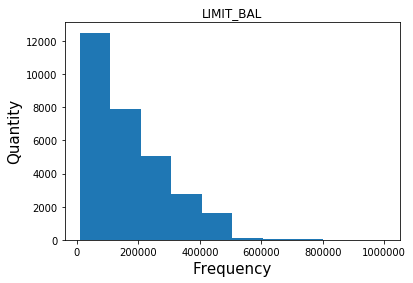

In [38]:
#first histogram using the .hist method of matplotlib
plt.hist(credit['LIMIT_BAL'])
plt.xlabel('Frequency',fontsize=15)
plt.ylabel("Quantity",fontsize=15)
plt.title('LIMIT_BAL')
plt.show()

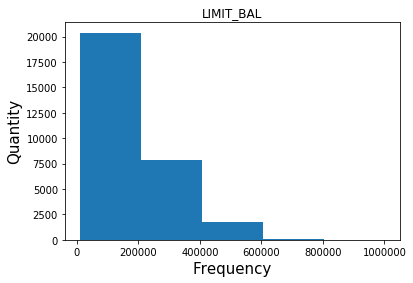

In [39]:
plt.hist(credit['LIMIT_BAL'], bins=5)
plt.xlabel('Frequency',fontsize=15)
plt.ylabel("Quantity",fontsize=15)
plt.title('LIMIT_BAL')
plt.show()

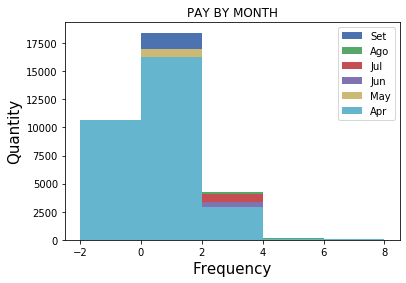

In [40]:
bins = 5;
plt.style.use('seaborn-deep')
plt.hist(credit['PAY_SET'],bins,label='Set')
plt.hist(credit['PAY_AGO'],bins,label='Ago')
plt.hist(credit['PAY_JUL'],bins,label='Jul')
plt.hist(credit['PAY_JUN'],bins,label='Jun')
plt.hist(credit['PAY_MAY'],bins,label='May')
plt.hist(credit['PAY_APR'],bins,label='Apr')
plt.xlabel('Frequency',fontsize=15)
plt.ylabel("Quantity",fontsize=15)
plt.title('PAY BY MONTH')
plt.legend(loc='upper right')
plt.show()

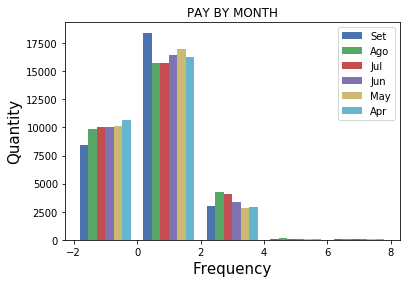

In [41]:
bins = 5;
plt.style.use('seaborn-deep')
plt.hist([credit['PAY_SET'],credit['PAY_AGO'],credit['PAY_JUL'],credit['PAY_JUN'],credit['PAY_MAY'],credit['PAY_APR']]
         ,bins,label=['Set','Ago','Jul','Jun','May','Apr'])
plt.xlabel('Frequency',fontsize=15)
plt.ylabel("Quantity",fontsize=15)
plt.title('PAY BY MONTH')
plt.legend(loc='upper right')
plt.show()

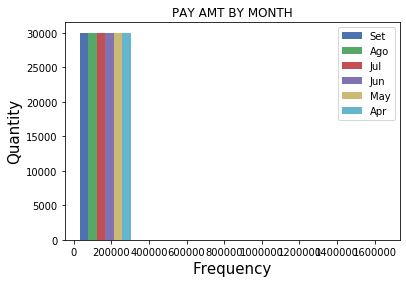

In [42]:
bins = 5;
plt.style.use('seaborn-deep')
plt.hist([credit['PAY_AMT_SET'],credit['PAY_AMT_AGO'],credit['PAY_AMT_JUL'],credit['PAY_AMT_JUN'],credit['PAY_AMT_MAY'],credit['PAY_AMT_APR']]
         ,bins,label=['Set','Ago','Jul','Jun','May','Apr'])
plt.xlabel('Frequency',fontsize=15)
plt.ylabel("Quantity",fontsize=15)
plt.title('PAY AMT BY MONTH')
plt.legend(loc='upper right')
plt.show()

In [43]:
#---------------------------- Line Plots
#used in EDA to illustrate the range and mode of any given numerical variable. This can be very important 
#for things like preventing bias and model overfit and even identifying collinearity

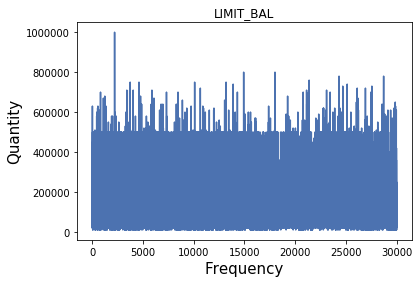

In [44]:
plt.plot(credit['LIMIT_BAL'])
plt.xlabel('Frequency',fontsize=15)
plt.ylabel("Quantity",fontsize=15)
plt.title('LIMIT_BAL')
plt.show()

In [45]:
#--------------------Scatter Plots
#This is very useful for understanding any possible relationships between the data, 
#but as you are aware, does not always point to any causal relationship

In [46]:
x = credit['PAY_SET']
y = credit['PAY_JUL']

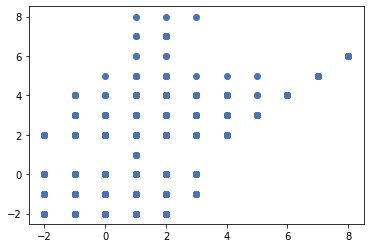

In [47]:
plt.scatter(x,y)
plt.show()

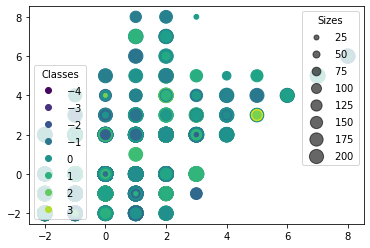

In [48]:
N= 50
colors = np.random.normal(size=30000)
size = np.random.randint(10, 220, size=N)
fig, ax = plt.subplots()
scatter = plt.scatter(x,y,c=colors,s=size)
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")



In [49]:
#----------------------------------- Box Plots
#called Box and Whisker Plots, are very useful for quickly visualizing where the bulk of the data
#is in any given feature ad are also very useful 
#for identifying feature with outliers or extreme variances in the observations

In [50]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SET',
       'PAY_AGO', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SET',
       'PAY_AMT_SET', 'PAY_AMT_AGO', 'PAY_AMT_JUL', 'PAY_AMT_JUN',
       'PAY_AMT_MAY', 'PAY_AMT_APR', 'NEXT_DEFAULT'],
      dtype='object')


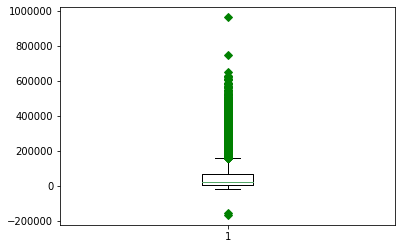

In [51]:
A = credit['BILL_AMT_SET']
plt.boxplot(A,0,'gD')
plt.show()

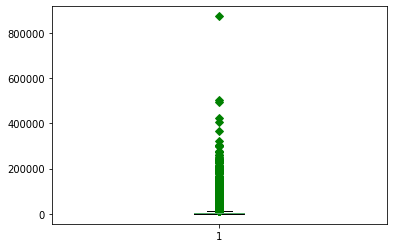

In [52]:
PMSET = credit['PAY_AMT_SET']
plt.boxplot(PMSET,0,'gD')
plt.show()

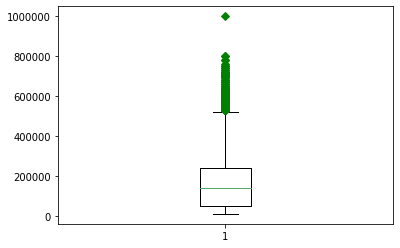

In [53]:
LB = credit['LIMIT_BAL']
plt.boxplot(LB,0,'gD')
plt.show()

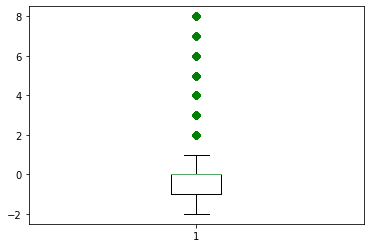

In [54]:
PSET = credit['PAY_SET']
plt.boxplot(PSET,0,'gD')
plt.show()

# Correlation


In [55]:
corrMat = credit.corr()
print(corrMat)

                    ID  LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE  \
ID            1.000000   0.026179  0.018497   0.039177 -0.029079  0.018678   
LIMIT_BAL     0.026179   1.000000  0.024755  -0.219161 -0.108139  0.144713   
SEX           0.018497   0.024755  1.000000   0.014232 -0.031389 -0.090874   
EDUCATION     0.039177  -0.219161  0.014232   1.000000 -0.143464  0.175061   
MARRIAGE     -0.029079  -0.108139 -0.031389  -0.143464  1.000000 -0.414170   
AGE           0.018678   0.144713 -0.090874   0.175061 -0.414170  1.000000   
PAY_SET      -0.030575  -0.271214 -0.057643   0.105364  0.019917 -0.039447   
PAY_AGO      -0.011215  -0.296382 -0.070771   0.121566  0.024199 -0.050148   
PAY_JUL      -0.018494  -0.286123 -0.066096   0.114025  0.032688 -0.053048   
PAY_JUN      -0.002735  -0.267460 -0.060173   0.108793  0.033122 -0.049722   
PAY_MAY      -0.022199  -0.249411 -0.055064   0.097520  0.035629 -0.053826   
PAY_APR      -0.020270  -0.235195 -0.044008   0.082316  0.034345

# Covariance

In [56]:
#The positive covariance >> when one variable grows the other variable too. They have a direct relationship.
#The negative covariance >> when one variable grows the other variable decreases. They have a reverse relationship.
covMat = credit.cov()
print(covMat)

                        ID     LIMIT_BAL          SEX     EDUCATION  \
ID            7.500250e+07  2.941664e+07    78.356379    268.154338   
LIMIT_BAL     2.941664e+07  1.683446e+10  1571.050630 -22474.028945   
SEX           7.835638e+01  1.571051e+03     0.239247      0.005502   
EDUCATION     2.681543e+02 -2.247403e+04     0.005502      0.624651   
MARRIAGE     -1.314525e+02 -7.323670e+03    -0.008014     -0.059184   
AGE           1.491057e+03  1.730767e+05    -0.409726      1.275380   
PAY_SET      -2.975726e+02 -3.954593e+04    -0.031685      0.093584   
PAY_AGO      -1.162770e+02 -4.603765e+04    -0.041442      0.115025   
PAY_JUL      -1.916922e+02 -4.443225e+04    -0.038694      0.107861   
PAY_JUN      -2.769132e+01 -4.057181e+04    -0.034411      0.100528   
PAY_MAY      -2.178600e+02 -3.667056e+04    -0.030521      0.087340   
PAY_APR      -2.018774e+02 -3.509308e+04    -0.024754      0.074816   
BILL_AMT_SET  1.236447e+07  2.727020e+09 -1211.694332   1372.377644   
PAY_AM

# Model

In [57]:
creditDS = pd.read_csv('C:\\Util\\Cenfotec\\Module5_Task2\\default of credit card clients_new.csv', header =0)

In [58]:
creditDS

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SET,PAY_AGO,PAY_JUL,...,PAY_MAY,PAY_APR,BILL_AMT_SET,PAY_AMT_SET,PAY_AMT_AGO,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,NEXT_DEFAULT
0,0,1,20000,2,2,1,24,2,2,-1,...,-2,-2,3913,0,689,0,0,0,0,1
1,1,2,120000,2,2,2,26,-1,2,0,...,0,2,2682,0,1000,1000,1000,0,2000,1
2,2,3,90000,2,2,2,34,0,0,0,...,0,0,29239,1518,1500,1000,1000,1000,5000,0
3,3,4,50000,2,2,1,37,0,0,0,...,0,0,46990,2000,2019,1200,1100,1069,1000,0
4,4,5,50000,1,2,1,57,-1,0,-1,...,0,0,8617,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,29996,220000,1,3,1,39,0,0,0,...,0,0,188948,8500,20000,5003,3047,5000,1000,0
29996,29996,29997,150000,1,3,2,43,-1,-1,-1,...,0,0,1683,1837,3526,8998,129,0,0,0
29997,29997,29998,30000,1,2,2,37,4,3,2,...,0,0,3565,0,0,22000,4200,2000,3100,1
29998,29998,29999,80000,1,3,1,41,1,-1,0,...,0,-1,-1645,85900,3409,1178,1926,52964,1804,1


In [59]:
#dependent variable
depVar = creditDS['NEXT_DEFAULT']


In [60]:
creditDS.shape

(30000, 21)

In [61]:
#The train_test_split function divides the dataset randomly,
#which may cause the distribution of some feature to be not as expected.

In [62]:
# by default 75% for Train and 25% for test 
train, test = train_test_split(creditDS, random_state = 0)

In [63]:
print(train.shape)
print(test.shape)

(22500, 21)
(7500, 21)


In [64]:
y = creditDS.pop("NEXT_DEFAULT")
X = creditDS

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [66]:
X_train.shape

(22500, 20)

In [67]:
y_train.shape

(22500,)

In [68]:
X_test.shape

(7500, 20)

In [69]:
y_test.shape

(7500,)

In [70]:
# what is the percentage of these records in the train and test blocks generated
credit.groupby("SEX")["NEXT_DEFAULT"].count()/len(credit)

SEX
1    0.396267
2    0.603733
Name: NEXT_DEFAULT, dtype: float64

In [71]:
#what is the percentage of these records in the train and test blocks generated
train.groupby("SEX")["NEXT_DEFAULT"].count()/len(train)

SEX
1    0.4
2    0.6
Name: NEXT_DEFAULT, dtype: float64

In [72]:
#what is the percentage of these records in the train and test blocks generated
test.groupby("SEX")["NEXT_DEFAULT"].count()/len(test)

SEX
1    0.385067
2    0.614933
Name: NEXT_DEFAULT, dtype: float64

In [73]:
#The stratify parameter allows us to generate the training and test blocks while preserving in both the percentage
# of the samples of the original dataset
train, test = train_test_split(credit, stratify = credit["SEX"])

In [74]:
train.groupby("SEX")["NEXT_DEFAULT"].count()/len(train)

SEX
1    0.396267
2    0.603733
Name: NEXT_DEFAULT, dtype: float64

In [75]:
test.groupby("SEX")["NEXT_DEFAULT"].count()/len(test)

SEX
1    0.396267
2    0.603733
Name: NEXT_DEFAULT, dtype: float64

# One-Hot Encoding

See https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/
Why Use a One Hot Encoding?
A one hot encoding allows the representation of categorical data to be more expressive.

Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.

We could use an integer encoding directly, rescaled where needed. This may work for problems where there is a natural ordinal relationship between the categories, and in turn the integer values, such as labels for temperature ‘cold’, warm’, and ‘hot’.

There may be problems when there is no ordinal relationship and allowing the representation to lean on any such relationship might be damaging to learning to solve the problem. An example might be the labels ‘dog’ and ‘cat’

In these cases, we would like to give the network more expressive power to learn a probability-like number for each possible label value. This can help in both making the problem easier for the network to model. When a one hot encoding is used for the output variable, it may offer a more nuanced set of predictions than a single label.

In [76]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [77]:
y_test

14338    0
24330    1
26543    0
5644     0
4414     0
        ..
18021    0
19274    0
21000    0
26407    0
27107    0
Name: NEXT_DEFAULT, Length: 7500, dtype: int64

In [78]:
test_values = array(y_test)

In [79]:
print(test_values)

[0 1 0 ... 0 0 0]


In [80]:
# integer encode
label_encoder = LabelEncoder()
test_integer_encoded = label_encoder.fit_transform(test_values)
print(test_integer_encoded)

[0 1 0 ... 0 0 0]


In [81]:
# binary encode
test_onehot_encoder = OneHotEncoder(sparse=False)
test_integer_encoded = test_integer_encoded.reshape(len(test_integer_encoded), 1)
test_onehot_encoded = test_onehot_encoder.fit_transform(test_integer_encoded)
print(test_onehot_encoded)

[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


C:\Users\DGamboa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [82]:
# invert first example
test_inverted = label_encoder.inverse_transform([argmax(test_onehot_encoded[0, :])])
print(test_inverted)

[0]


In [83]:
y_train

21972    1
4436     0
17402    1
2533     0
11684    0
        ..
601      1
27087    0
3804     1
7476     1
9313     1
Name: NEXT_DEFAULT, Length: 22500, dtype: int64

In [84]:
train_values = array(y_train)
print(train_values)

[1 0 1 ... 1 1 1]


In [85]:
# integer encode
label_encoder = LabelEncoder()
train_integer_encoded = label_encoder.fit_transform(train_values)
print(train_integer_encoded)

[1 0 1 ... 1 1 1]


In [86]:
# binary encode
train_onehot_encoder = OneHotEncoder(sparse=False)
train_integer_encoded = train_integer_encoded.reshape(len(train_integer_encoded), 1)
train_onehot_encoded = train_onehot_encoder.fit_transform(train_integer_encoded)
print(train_onehot_encoded)

[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


C:\Users\DGamboa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [87]:
# invert first example
train_inverted = label_encoder.inverse_transform([argmax(train_onehot_encoded[0, :])])
print(train_inverted)

[1]


# Build the Models and choosing the right Mode

In [88]:
# Model : Support Vector Machines (SVM)

In [89]:
from sklearn import svm
modelSVM = svm.SVC(gamma='auto')
modelSVM.fit(X_test, y_test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [90]:
print(cross_val_score(modelSVM, X_train, y_train,cv=3)) 
modelSVM.score(X_train,y_train)

[0.77776296 0.77786667 0.77783704]


0.7778222222222222

In [91]:
# save the model to disk
import pickle
filename = 'C:\\Util\\Cenfotec\\Module5_Task3\\finalized_modelSVM.sav'
pickle.dump(modelSVM, open(filename, 'wb'))

In [92]:
# Model: Stochastic Gradient Descent

In [93]:
from sklearn.linear_model import SGDClassifier
modelSGD = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)
modelSGD.fit(X_train, y_train)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [94]:
print(cross_val_score(modelSGD, X_train, y_train,cv=3)) 
modelSGD.score(X_train,y_train)

[0.2279696  0.7676     0.77356981]


0.7034222222222222

In [95]:
# save the model to disk
filename = 'C:\\Util\\Cenfotec\\Module5_Task3\\finalized_modelSGD.sav'
pickle.dump(modelSGD, open(filename, 'wb'))

In [96]:
#Model: Decision Trees

In [97]:
from sklearn import tree
modelTree = tree.DecisionTreeClassifier()
modelTree = modelTree.fit(X_train, y_train)

In [98]:
print(cross_val_score(modelTree, X_train, y_train,cv=3)) 
modelTree.score(X_train,y_train)

[0.72776963 0.72493333 0.72769703]


1.0

In [99]:
# save the model to disk
filename = 'C:\\Util\\Cenfotec\\Module5_Task3\\finalized_modelTree.sav'
pickle.dump(modelTree, open(filename, 'wb'))

In [100]:
#Model: Neural network models (supervised)

In [101]:
from sklearn.neural_network import MLPClassifier
modelNeuralNtw = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

modelNeuralNtw.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [102]:
print(cross_val_score(modelNeuralNtw, X_train, y_train,cv=3)) 
modelNeuralNtw.score(X_train,y_train)

[0.77776296 0.77786667 0.77743699]


0.7535555555555555

In [103]:
# save the model to disk
filename = 'C:\\Util\\Cenfotec\\Module5_Task3\\finalized_modelNeuralBtw.sav'
pickle.dump(modelNeuralNtw, open(filename, 'wb'))

# Model Tunning

The parameters selected are those that maximize the score of the left out data, unless an explicit score is passed in which case it is used instead.

In [104]:
modelSVM.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [105]:
modelSGD.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [106]:
modelTree.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [107]:
modelNeuralNtw.get_params()

{'activation': 'relu',
 'alpha': 1e-05,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (5, 2),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [ ]:
#-----------Tunning for SVM  was not executed due to takes more than 10 hrs  



parameters = {'kernel':['linear', 'rbf'], 'C':[1, 10]}
modelSVM_Tunned = GridSearchCV(modelSVM, parameters)
modelSVM_Tunned.fit(X_train,y_train)


C:\Users\DGamboa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [ ]:
sorted(modelSVM_Tunned.cv_results_.keys())

In [108]:
parametersSGD = {'loss':['hinge', 'log','modified_huber','squared_hinge'], 'max_iter':[500, 10000,1500]}
modelSGD_Tunned = GridSearchCV(modelSGD, parametersSGD)
modelSGD_Tunned.fit(X_train,y_train)

C:\Users\DGamboa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'loss': ['hinge', 'log', 'modified_huber',
                                  'squared_hinge'],
                         'max_iter': [500, 10000, 1500]},
             pre

In [109]:
sorted(modelSGD_Tunned.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_loss',
 'param_max_iter',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [110]:
parametersTree = {'splitter':['best', 'random'], 'max_depth':[10,20,30]}
modelTree_Tunned = GridSearchCV(modelTree, parametersTree)
modelTree_Tunned.fit(X_train,y_train)

C:\Users\DGamboa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [10, 20, 30],
                         'splitter': ['best', 'random']},
             pre_disp

In [111]:
sorted(modelTree_Tunned.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_splitter',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [114]:
parametersNeuralNtw = {'solver':['sgd', 'lbfgs'], 'learning_rate':['adaptive','invscaling']}
modelNeuralNtw_Tunned = GridSearchCV(modelNeuralNtw, parametersNeuralNtw)
modelNeuralNtw_Tunned.fit(X_train,y_train)

C:\Users\DGamboa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=1e-05,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(5, 2),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=1, shuffle=True,
                                     solver='lbfgs', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': ['adaptive', 'invscali

In [115]:
sorted(modelNeuralNtw_Tunned.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_learning_rate',
 'param_solver',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [1]:
#Best Model with improvements :  Support Vector Machines (SVM)

# Making Predictions and Evaluation Results

In [ ]:
# Using First  option SVM

In [117]:
# load the model from disk
loaded_model = pickle.load(open('C:\\Util\\Cenfotec\\Module5_Task3\\finalized_modelSVM.sav', 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

1.0


In [134]:

result = modelSVM.score(X_test, y_test)
print(result)

1.0


In [135]:
predictions = modelSVM.predict(X_test)

In [136]:
#Now you can use the sqrt function and the mean_squared_error function to compose your own function for calculating RMSE
rmse = sqrt(mean_squared_error(y_test, predictions))

In [137]:
# Next, establish a variable and use the included function, the ground truth, and the predictions to calculate R Squared
#as follows:
predRsquared = r2_score(y_test,predictions)

In [139]:
#Here is how it all looks together:
#Make Predictions
predictions = modelSVM.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 1.000
RMSE: 0.000


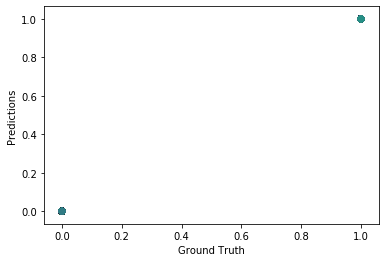

In [140]:
colors = np.random.normal(size=7500)
plt.scatter(y_test, predictions,c=colors, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [127]:
# Using Second best option Neural Model
modelNeuralNtw

In [128]:
result = modelNeuralNtw.score(X_test, y_test)
print(result)

0.7532


In [129]:
predictions = modelNeuralNtw.predict(X_test)

In [130]:
#Now you can use the sqrt function and the mean_squared_error function to compose your own function for calculating RMSE
rmse = sqrt(mean_squared_error(y_test, predictions))

In [131]:
# Next, establish a variable and use the included function, the ground truth, and the predictions to calculate R Squared
#as follows:
predRsquared = r2_score(y_test,predictions)

In [132]:
#Here is how it all looks together:
#Make Predictions
predictions = modelNeuralNtw.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.446
RMSE: 0.497


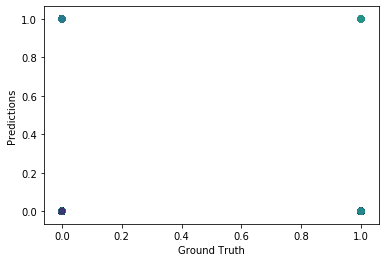

In [133]:
colors = np.random.normal(size=7500)
plt.scatter(y_test, predictions,c=colors, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();